<a href="https://colab.research.google.com/github/Kendoo41/DNN_Scratch/blob/main/NN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic numerical Computing

In [1]:
import numpy as np
x = np.zeros((3, 2))
x

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [2]:
x.shape, x.dtype

((3, 2), dtype('float64'))

In [3]:
x[0, 1] = 1
x

array([[0., 1.],
       [0., 0.],
       [0., 0.]])

In [4]:
x[:, 0] = 2
x

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [5]:
x = np.array([[1, 2], [3, 4], [5, 6]])
x

array([[1, 2],
       [3, 4],
       [5, 6]])

In [6]:
X = np.array([10, 20])
print(X)
print(X.shape, X.dtype)

#Element-wise sum
X+x

[10 20]
(2,) int64


array([[11, 22],
       [13, 24],
       [15, 26]])

In [7]:
# Element-wise multiplication
X*x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [8]:
# Matrix multiplication
X = np.array([[10, 20]]).T
mul = x @ X # or np.dot(x, X)
# mul.dtype
mul

array([[ 50],
       [110],
       [170]])

# Indexing

In [9]:
y = np.random.rand(3, 2) # matrix 3x2 with random element in standard distribution
y

array([[0.14183406, 0.72395797],
       [0.01751576, 0.12580384],
       [0.84068721, 0.51883983]])

In [10]:
y > 0.5 # return a mask of true and false

array([[False,  True],
       [False, False],
       [ True,  True]])

In [11]:
y[y > 0.5] = 1 # indexing matrix
y

array([[0.14183406, 1.        ],
       [0.01751576, 0.12580384],
       [1.        , 1.        ]])

# Basic Plotting

In [12]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

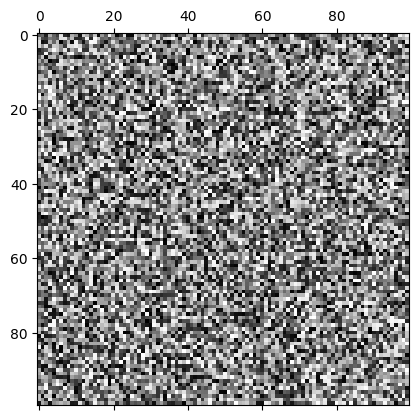

In [13]:
X = np.random.rand(100, 100)
plt.matshow(X)
# plt.colorbar()

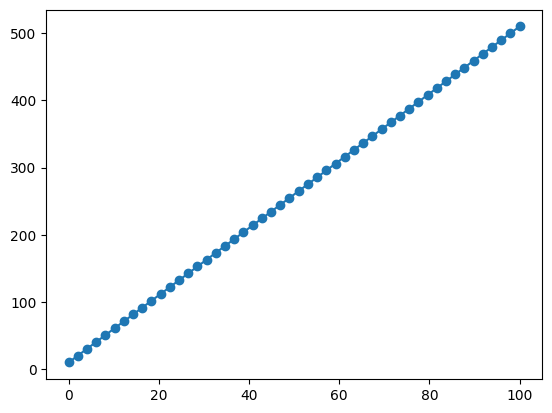

In [14]:
x = np.linspace(0, 100)
y = x * 5 + 10
plt.plot(x, y, 'o-')

# Basic Regression

x: (50, 1), weights: (1, 1), bias: (), y: (50, 1)


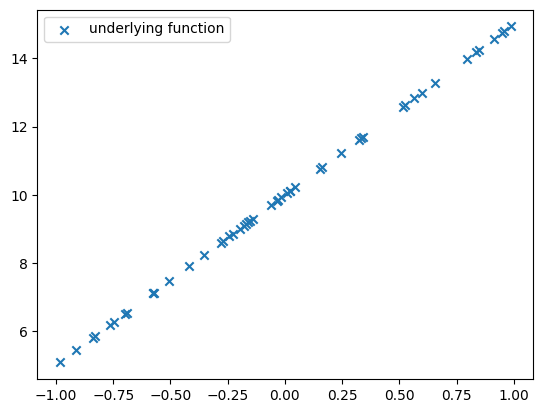

In [95]:
n = 50
d = 1
x = np.random.uniform(-1, 1, (n, d))
weights_true = np.array([[5],])
bias_true = np.array(10)

y_true = x @ weights_true + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.scatter(x, y_true, marker='x', label='underlying function')
plt.legend()

# Basic the prediction: Linear

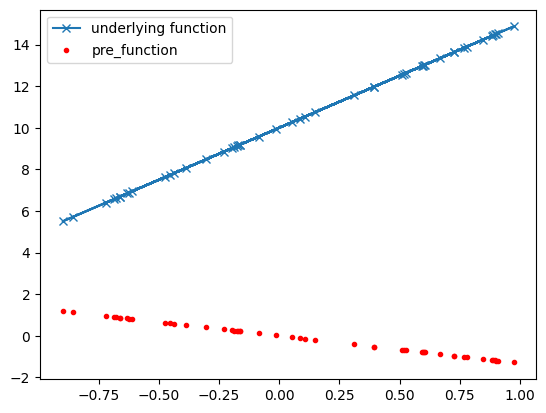

In [24]:
class Linear:
  # initial the prediction
    def __init__(self, num_input, num_output = 1):
        self.weights = np.random.randn(num_input, num_output)*np.sqrt(2./num_input)  #random weights
        self.bias = np.zeros((1))

    def __call__(self, x):
        return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x,y_true, marker = 'x', label = 'underlying function')
plt.scatter(x,y_pred, color = 'r', marker='.', label='pre_function')
plt.legend()

# Basic loss function: MSE

In [25]:
#how wrong are these initial predictions?

class MSE:
    def __call__(self, y_pred,y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred)**2).mean()
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 126.20236373699753


# Add back propagation

In [36]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred)**2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2.*(self.y_pred - self.y_true) / n
    return self.gradient

class Linear:
  def __init__(self, input_dim: int, num_hidden: int=1):
    self.weights = np.random.randn(input_dim, num_hidden) - 0.5 #distribute from -0.5 - > 0.5
    self.bias = np.random.randn(num_hidden) - 0.5

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  #y = w*x +b
  # => dy/dx = w
  #   dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr*self.weights_gradient
    self.bias = self.bias - lr*self.bias_gradient

In [37]:
loss = MSE()
linear = Linear(d) # initialize
y_pred = linear(x) # call
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x) # call
print(loss(y_pred, y_true))

89.7627903392649
58.247385552590515


# Training

Epoch 0, loss 114.13412713733429
Epoch 5, loss 13.757941652874251
Epoch 10, loss 2.405378444566531
Epoch 15, loss 0.7449523197058547
Epoch 20, loss 0.32785053769686323
Epoch 25, loss 0.1607053115105592
Epoch 30, loss 0.08072746793064925
Epoch 35, loss 0.040760611652683104
Epoch 40, loss 0.020602434943442903
Epoch 45, loss 0.010415746507638572
Epoch 50, loss 0.005266007888663795
Epoch 55, loss 0.002662419909254812


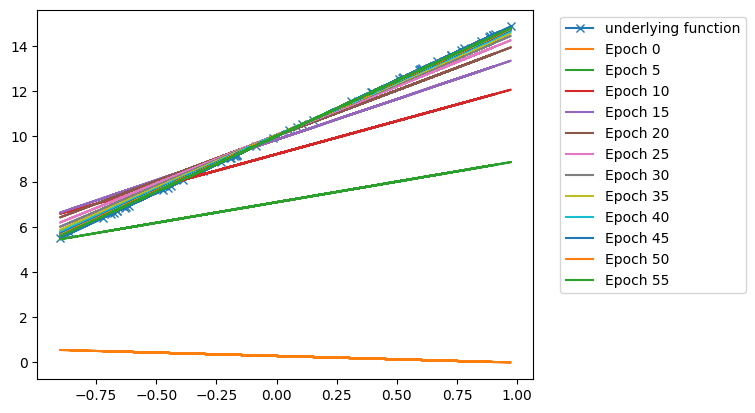

In [38]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0: # print, plot after every 5 epochs
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label = f'Epoch {epoch}')
  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [44]:
# 2-D of x

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))
# y = w * x + b
# y = w0 * x0 + w1 * x1 + b
# y = w @ x + b

weights_true = np.array([[2, -1]]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true =  x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


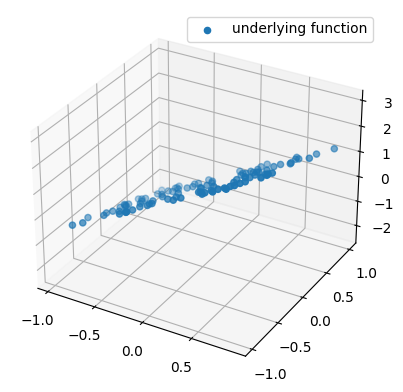

In [58]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label = 'underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label = 'our function')
  plt.legend()

plot_3d(x, y_true)

11.121737565264645


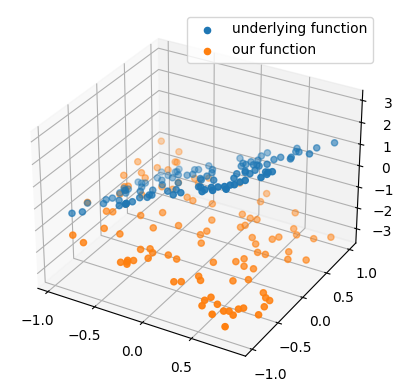

In [61]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 11.121737565264645
Epoch 1, loss 7.969491054083387
Epoch 2, loss 5.8377331433147335
Epoch 3, loss 4.373948198423423
Epoch 4, loss 3.350810315280397
Epoch 5, loss 2.6212258651062506
Epoch 6, loss 2.089592171763384
Epoch 7, loss 1.6934130377972656
Epoch 8, loss 1.3915303790570706
Epoch 9, loss 1.1565835630417596
Epoch 10, loss 0.9701713152059483
Epoch 11, loss 0.8197421541815012
Epoch 12, loss 0.6965911494755838
Epoch 13, loss 0.5945654315677517
Epoch 14, loss 0.5092243248813558
Epoch 15, loss 0.4372915809913801
Epoch 16, loss 0.37629570487523545
Epoch 17, loss 0.3243317546888354
Epoch 18, loss 0.279901892435885
Epoch 19, loss 0.24180724424200672
Epoch 20, loss 0.2090734071534132
Epoch 21, loss 0.18089820159258047
Epoch 22, loss 0.15661428365428137
Epoch 23, loss 0.13566180960260651
Epoch 24, loss 0.11756800378435794
Epoch 25, loss 0.10193155135959646
Epoch 26, loss 0.08841043008272115
Epoch 27, loss 0.0767122459561866
Epoch 28, loss 0.06658643235847168
Epoch 29, loss 0.057

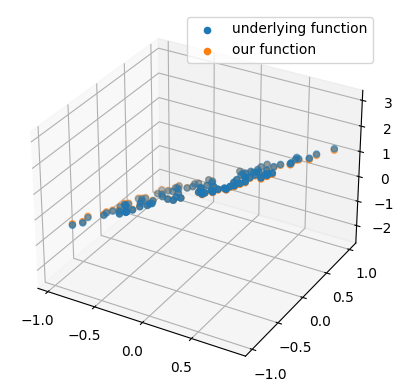

In [62]:
from typing import Callable
def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable,
        lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=60)
plot_3d(x, y_true, linear(x))

# Basic Regression with a Multi-layer perceptron or Neural Network

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


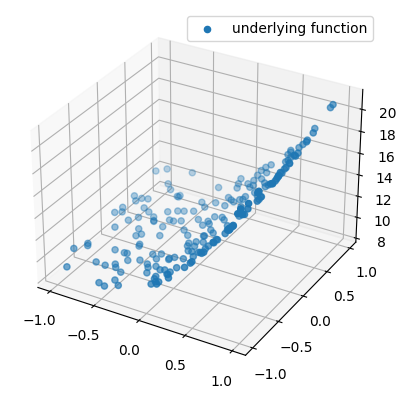

In [171]:
#Non linear function
n = 200
d = 2
x = np.random.uniform(-1,1,(n,d))

weights_true = np.array([[5,1]]).T
bias_true = np.array([10])

y_true = (x**2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')
plot_3d(x, y_true)

In [73]:
print(f"x[0] : {x[0]}")
print(f"x[0] ** 2: {x[0] ** 2}")
print(f"y[0] : {y[0]}")
print(f"weights: {weights_true}")

x[0] : [ 0.28815792 -0.01386287]
x[0] ** 2: [0.08303499 0.00019218]
y[0] : 10.0
weights: [[5]
 [1]]


Epoch 0, loss 173.35999713656938
Epoch 1, loss 113.70967760319924
Epoch 2, loss 75.40038177405236
Epoch 3, loss 50.729341221726955
Epoch 4, loss 34.78243839528744
Epoch 5, loss 24.42357956340551
Epoch 6, loss 17.65045572809665
Epoch 7, loss 13.183846873210575
Epoch 8, loss 10.20579360552789
Epoch 9, loss 8.1926630015595
Epoch 10, loss 6.808705459714308
Epoch 11, loss 5.838173326430788
Epoch 12, loss 5.142023034516913
Epoch 13, loss 4.630290500342832
Epoch 14, loss 4.24445993184007
Epoch 15, loss 3.9462053117731024
Epoch 16, loss 3.710196346300529
Epoch 17, loss 3.5194973149673423
Epoch 18, loss 3.362620574191776
Epoch 19, loss 3.231636435253474
Epoch 20, loss 3.1209578634514794
Epoch 21, loss 3.0265566119736347
Epoch 22, loss 2.9454554943804863
Epoch 23, loss 2.8753976684154554
Epoch 24, loss 2.8146296234047194
Epoch 25, loss 2.7617574102790337
Epoch 26, loss 2.715650229262144
Epoch 27, loss 2.6753747928305827
Epoch 28, loss 2.640149821344754
Epoch 29, loss 2.6093138238343765
Epoch 30,

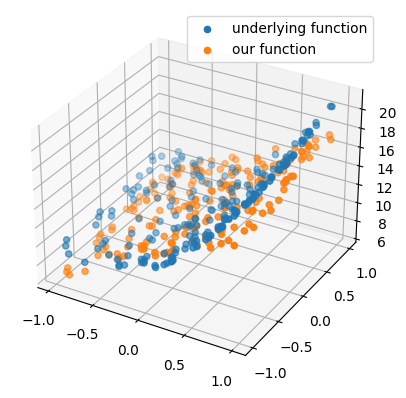

In [74]:
#try to approximate this function by linear regression

loss = MSE()
linear = Linear(d)
fit(x, y_true, model = linear, loss = loss, lr = 0.1, num_epochs = 40)
plot_3d(x, y_true, linear(x))

# Using Non-Linearity: ReLU

In [85]:
class ReLU:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input_ > 0) * output_gradient
    return self.input_gradient

relu = ReLU()
input_ = np.expand_dims(np.array([1,0.5,0,-0.5,-1]),-1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


In [78]:
np.array([1,0.5,0,-0.5,-1])

array([ 1. ,  0.5,  0. , -0.5, -1. ])

In [87]:
class ReLu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_,0,None)
        return self.output

    def backward(self, output_gradient):
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient

relu = ReLu()
input_ = np.expand_dims(np.array([1,0.5,0,-0.5,-1]),-1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


In [96]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)  #multiply matrix random weights
    self.relu = ReLu()
    self.linear2 = Linear(num_hidden, 1)       # mtrix random weights

  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred)**2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2.*(self.y_pred - self.y_true) / n
    return self.gradient

class Linear:
  def __init__(self, input_dim: int, num_hidden: int=1):
    self.weights = np.random.randn(input_dim, num_hidden) - 0.5 #distribute from -0.5 - > 0.5
    self.bias = np.random.randn(num_hidden) - 0.5

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  #y = w*x +b
  # => dy/dx = w
  #   dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr*self.weights_gradient
    self.bias = self.bias - lr*self.bias_gradient
#test just one forward and backward step

class ReLu:
  def __call__(self, input_):
      self.input_ = input_
      self.output = np.clip(self.input_,0,None)
      return self.output

  def backward(self, output_gradient):
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

loss = MSE()
model = Model(d,10)
y_pred = model(x)
loss_value = loss(y_pred,y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x,y_true,y_pred)

# Try with PyTorch instead of coding from scratch

tensor(155.3687, grad_fn=<MseLossBackward0>)


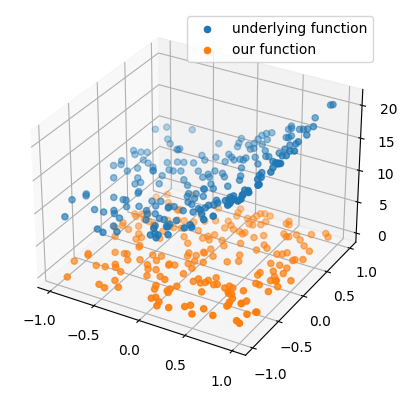

In [172]:
import torch
import torch.nn as nn

class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)

  def forward(self, x):
    l1 = self.linear1(x)
    r  = self.relu(l1)
    l2 = self.linear2(r)
    return l2

# initial loss
loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor) # call forward
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_3d(x_tensor, y_true_tensor, y_pred_tensor.detach())

In [173]:
# test just one forward and one backward step

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(155.3687, grad_fn=<MseLossBackward0>)
tensor(145.3943, grad_fn=<MseLossBackward0>)


tensor(145.3943, grad_fn=<MseLossBackward0>)
tensor(41.8533, grad_fn=<MseLossBackward0>)
tensor(91.4859, grad_fn=<MseLossBackward0>)
tensor(119.2287, grad_fn=<MseLossBackward0>)
tensor(80.0017, grad_fn=<MseLossBackward0>)
tensor(54.4158, grad_fn=<MseLossBackward0>)
tensor(36.5661, grad_fn=<MseLossBackward0>)
tensor(21.0981, grad_fn=<MseLossBackward0>)
tensor(6.9538, grad_fn=<MseLossBackward0>)
tensor(3.8123, grad_fn=<MseLossBackward0>)
tensor(2.7419, grad_fn=<MseLossBackward0>)
tensor(2.0087, grad_fn=<MseLossBackward0>)
tensor(1.5618, grad_fn=<MseLossBackward0>)
tensor(1.2525, grad_fn=<MseLossBackward0>)
tensor(1.0353, grad_fn=<MseLossBackward0>)
tensor(0.8753, grad_fn=<MseLossBackward0>)
tensor(0.7580, grad_fn=<MseLossBackward0>)
tensor(0.6706, grad_fn=<MseLossBackward0>)
tensor(0.6051, grad_fn=<MseLossBackward0>)
tensor(0.5538, grad_fn=<MseLossBackward0>)
tensor(0.5117, grad_fn=<MseLossBackward0>)
tensor(0.4777, grad_fn=<MseLossBackward0>)
tensor(0.4512, grad_fn=<MseLossBackward0>)
t

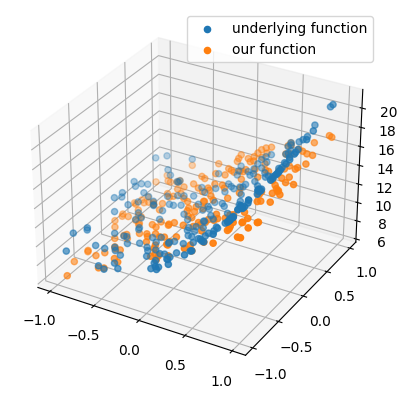

In [174]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    optimizer = torch.optim.SGD(model.parameters(), lr = lr)
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred_tensor = model(x_tensor)
        loss_value = loss(y_pred_tensor, y_true_tensor)
        print(loss_value)
        loss_value.backward()
        optimizer.step()
torch_fit(x_tensor, y_true_tensor, model = model, loss=loss, lr = 0.1, num_epochs = 40)
plot_3d(x, y_true, linear(x))

# Try with TensorFlow/Keras

In [176]:
from tensorflow import keras
from keras import layers
from keras import optimizers

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
7/7 [==============================] - 1s 4ms/step - loss: 52.0573
Epoch 2/60
7/7 [==============================] - 0s 2ms/step - loss: 18.3418
Epoch 3/60
7/7 [==============================] - 0s 2ms/step - loss: 2.5880
Epoch 4/60
7/7 [==============================] - 0s 2ms/step - loss: 0.4059
Epoch 5/60
7

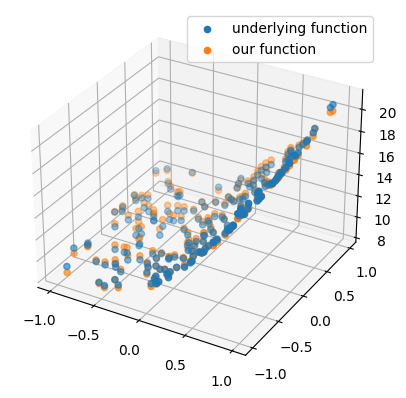

In [178]:
inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
model.fit(x, y_true, epochs=60)
y_pred = model.predict(x)
plot_3d(x, y_true, model(x))